<a href="https://colab.research.google.com/github/Valdi1111/DataIntensive-2023/blob/master/birth_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduzione

Questo progetto consiste nel mostrare la correlazione fra pil pro capite ed tasso di educazione di uno stato con la media dei figli fatti da una donna.

Sono presenti molti studi che ci dicono di tale correlazione, noi andremo quindi ad addestrare un modello per predirre il birth rate dati questi due parametri.

##Partecipanti

**Alam MD Shokot** davide.valdifiori@studio.unibo.it 0000933749

**Valdifiori Davide** mdshokot.alam@studio.unibo.it 0000941631

#Caricamento Librerie

Per prima cosa carichiamo le librerie per effettuare operazioni sui dati

*   NumPy per creare e operare su array a N dimensioni
*   pandas per caricare e manipolare dati tabulari
*   matplotlib per creare grafici

Importiamo le librerie usando i loro alias convenzionali e abilitando l'inserimento dei grafici direttamente nel notebook

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt

%matplotlib inline

Per gli altri componenti li importeremo man mano quando necessario.

#Caricamento dei dati

Per il nostro progetto utilizzeremo due dataset differenti presi da [Our World in Data](https://ourworldindata.org) che andremo poi ad unire per formare un unico dataset.

In [35]:
import os.path
from urllib.request import urlretrieve

def download_dataset(nome_file):
  if not os.path.exists(nome_file):
    urlretrieve("https://raw.githubusercontent.com/Valdi1111/DataIntensive-2023/master/" + nome_file, nome_file)

DATASET_EDUCATION = "attendance-vs-enrollment-rates-primary-education.csv"
DATASET_FERTILITY = "children-per-woman-fertility-rate-vs-level-of-prosperity.csv"

download_dataset(DATASET_EDUCATION)
download_dataset(DATASET_FERTILITY)

Carichiamo ora il [primo dataset](https://ourworldindata.org/grapher/children-per-woman-fertility-rate-vs-level-of-prosperity?xScale=linear) con attendance e enrollment alla scuola primaria misurati per paese e anno.

In [36]:
educationCsv = pd.read_csv(DATASET_EDUCATION, sep=",")
educationCsv.head()

,Entity,Code,Year,"Total net attendance rate, primary, both sexes (%)","Total net enrolment rate, primary, both sexes (%)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2011,57.36935,NaN,29249156.0,NaN
2,Afghanistan,AFG,2015,62.76610,NaN,33753500.0,Asia
3,Afghanistan,AFG,1974,NaN,26.82221,11869881.0,NaN
4,Afghanistan,AFG,1993,NaN,26.76600,14003764.0,NaN


##Colonne dataset 1

Le feature presenti nel Dataset sono:

*   `Entity` paese in cui è stato effettuato il campionamento
*   `Code` codice del paese
*   `Year` anno del campionamento
*   `Total net attendance rate, primary, both sexes (%)` percentuale di frequenza
*   `Total net enrolment rate, primary, both sexes (%)` percentuale di iscrizione
*   `Population (historical estimates)` popolazione del paese
*   `Continent` continente in cui è situato il paese

Carichiamo ora il [secondo dataset](https://ourworldindata.org/grapher/children-per-woman-fertility-rate-vs-level-of-prosperity) con fertility rate e pil pro capite misurati per paese e anno.

In [37]:
fertilityCsv = pd.read_csv(DATASET_FERTILITY, sep=",")
fertilityCsv.head()

,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,7.2484,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,7.2596,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,7.2601,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,7.2662,NaN,7764549.0,NaN


##Colonne dataset 2

Le feature presenti nel Dataset sono:

*   `Entity` paese in cui è stato effettuato il campionamento
*   `Code` codice del paese
*   `Year` anno del campionamento
*   `Fertility rate - Sex: all - Age: all - Variant: estimates` numero medio di figli per donna
*   `GDP per capita (output, multiple price benchmarks)` pil pro capite
*   `Population (historical estimates)` popolazione del paese
*   `Continent` continente in cui è situato il paese


##Unione dei dataset

Procediamo ora con l'eliminazione delle colonne superflue, la creazione degli indici e l'unione dei due dataset in uno unico.

In [38]:
educationCsv.drop(columns=["Code", "Population (historical estimates)", "Total net attendance rate, primary, both sexes (%)", "Continent"], inplace=True)
educationCsv.set_index(["Entity","Year"], inplace=True)
educationCsv.head()

Total net enrolment rate, primary, both sexes (%)
Entity      Year                                                   
Abkhazia    2015                                                NaN
Afghanistan 2011                                                NaN
            2015                                                NaN
            1974                                           26.82221
            1993                                           26.76600

In [39]:
fertilityCsv.drop(columns=["Code", "Population (historical estimates)", "Continent"], inplace=True)
fertilityCsv.set_index(["Entity","Year"], inplace=True)
fertilityCsv.head()

Fertility rate - Sex: all - Age: all - Variant: estimates  \
Entity      Year                                                              
Abkhazia    2015                                                NaN           
Afghanistan 1950                                             7.2484           
            1951                                             7.2596           
            1952                                             7.2601           
            1953                                             7.2662           

                  GDP per capita (output, multiple price benchmarks)  
Entity      Year                                                      
Abkhazia    2015                                                NaN   
Afghanistan 1950                                                NaN   
            1951                                                NaN   
            1952                                                NaN   
            1953                                                NaN

In [40]:
dataset = pd.merge(educationCsv, fertilityCsv, on=["Entity","Year"]);
dataset.head()

Total net enrolment rate, primary, both sexes (%)  \
Entity      Year                                                      
Abkhazia    2015                                                NaN   
Afghanistan 2011                                                NaN   
            2015                                                NaN   
            1974                                           26.82221   
            1993                                           26.76600   

                  Fertility rate - Sex: all - Age: all - Variant: estimates  \
Entity      Year                                                              
Abkhazia    2015                                                NaN           
Afghanistan 2011                                             5.9581           
            2015                                             5.4052           
            1974                                             7.5258           
            1993                                             7.7186           

                  GDP per capita (output, multiple price benchmarks)  
Entity      Year                                                      
Abkhazia    2015                                                NaN   
Afghanistan 2011                                                NaN   
            2015                                                NaN   
            1974                                                NaN   
            1993                                                NaN

In [41]:
ENROLMENT_COLUMN = 'Total net enrolment rate, primary, both sexes (%)';
FERTILITY_COLUMN = 'Fertility rate - Sex: all - Age: all - Variant: estimates';
GDP_COLUMN = 'GDP per capita (output, multiple price benchmarks)';

#Analisi generale dei dati

Per prima cosa analizziamo quanti dati nulli sono presenti all'interno del nostro dataset. Poichè sono presenti anche dati molto vecchi, mi aspetto di avere un numero elevato di record nulli.

In [42]:
dataset.isna().sum()

Total net enrolment rate, primary, both sexes (%)            53579
Fertility rate - Sex: all - Age: all - Variant: estimates    40311
GDP per capita (output, multiple price benchmarks)           47748
dtype: int64

Procediamo quandi con l'eliminazione di tutte quelle righe che hanno uno o più campi nulli.

In [43]:
dataset.dropna(inplace=True)
dataset.head()

Total net enrolment rate, primary, both sexes (%)  \
Entity  Year                                                      
Albania 2009                                           87.05775   
        2017                                           97.77841   
        1999                                           96.79354   
        2000                                           95.38335   
        2001                                           93.86551   

              Fertility rate - Sex: all - Age: all - Variant: estimates  \
Entity  Year                                                              
Albania 2009                                             1.6474           
        2017                                             1.4909           
        1999                                             2.3176           
        2000                                             2.2310           
        2001                                             2.1503           

              GDP per capita (output, multiple price benchmarks)  
Entity  Year                                                      
Albania 2009                                          9320.3680   
        2017                                         12126.5230   
        1999                                          5292.0273   
        2000                                          5315.4300   
        2001                                          5525.6910

Visualizziamo alcune statistiche per prendere coscienza dei dati che dovremo analizzare e delle caratteristiche del dominio applicativo.


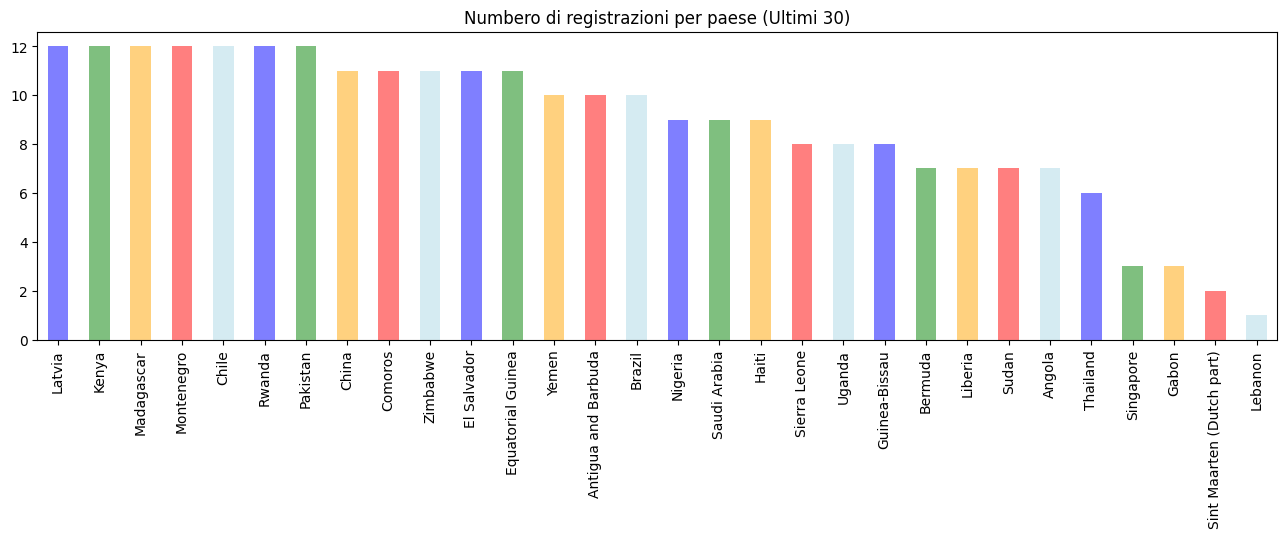

In [44]:
df = dataset.reset_index()
histo = df["Entity"].value_counts()[-30:].plot.bar(figsize=(16, 4), color=["blue","green","orange","red","lightblue"], alpha=0.5)
histo.set_title("Numbero di registrazioni per paese (Ultimi 30)");
plt.show()

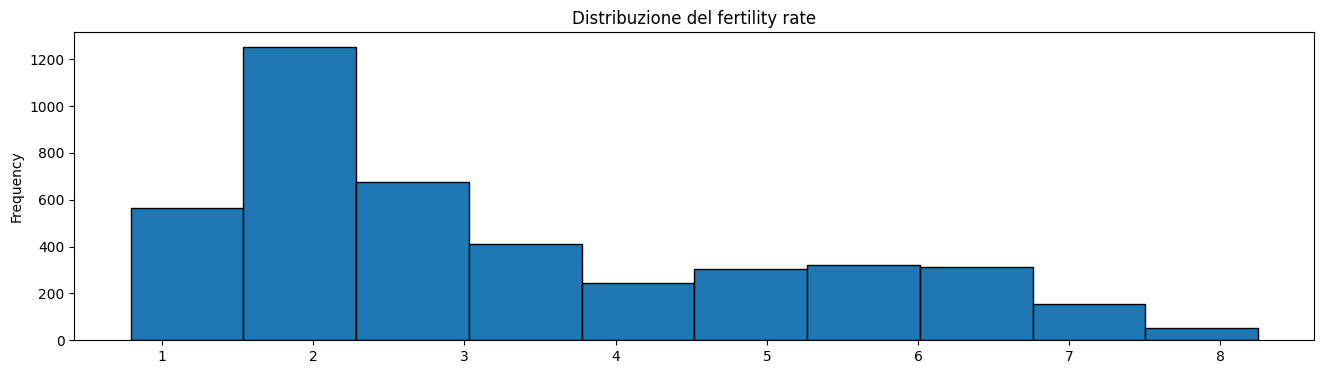

In [45]:
df = dataset.reset_index()
histo = df[FERTILITY_COLUMN].plot.hist(figsize=(16, 4), bins=10, edgecolor="black")
histo.set_title("Distribuzione del fertility rate");
plt.show()

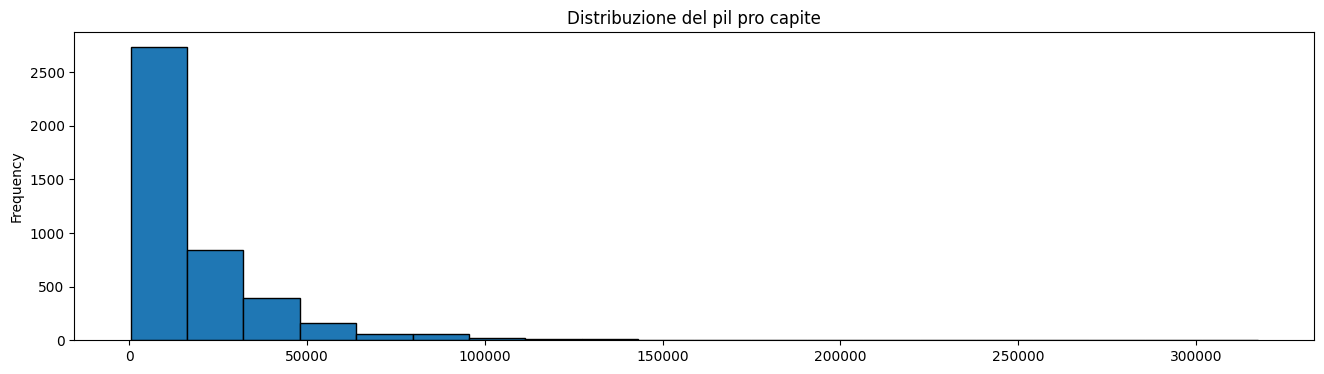

In [46]:
df = dataset.reset_index()
histo = df[GDP_COLUMN].plot.hist(figsize=(16, 4), bins=20, edgecolor="black")
histo.set_title("Distribuzione del pil pro capite");
plt.show()

Possiamo notare che sono presenti alcuni casi estremi in cui il pil pro capite è  molto elevato rispetto agli altri dati. Procediamo con la rimozione di alcuni record alle estremità del dataset.

In [47]:
dataset.drop(dataset[(dataset[GDP_COLUMN] > dataset[GDP_COLUMN].quantile(0.975)) | (dataset[GDP_COLUMN] < dataset[GDP_COLUMN].quantile(0.010))].index, inplace=True)

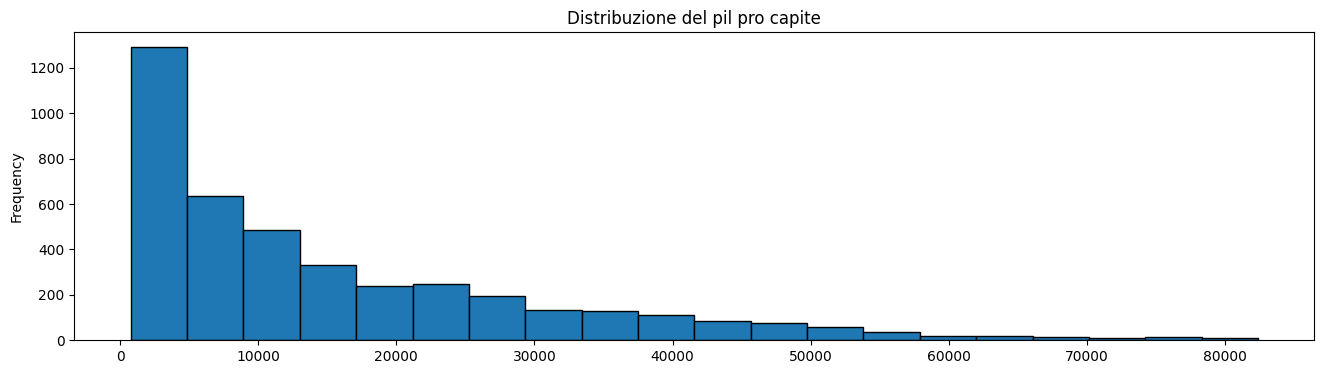

In [48]:
df = dataset.reset_index()
histo = df[GDP_COLUMN].plot.hist(figsize=(16, 4), bins=20, edgecolor="black")
histo.set_title("Distribuzione del pil pro capite");
plt.show()

Estrapoliamo anche le statistiche di ogni colonna. Nel fertility rate, notiamo che nonostante una sproporzione dei dati sul due, la media è comunque maggiore del 3%.

In [49]:
dataset.describe()

,"Total net enrolment rate, primary, both sexes (%)",Fertility rate - Sex: all - Age: all - Variant: estimates,"GDP per capita (output, multiple price benchmarks)"
count,4145.000000,4145.000000,4145.000000
mean,87.407064,3.252451,15763.024319
std,16.965745,1.798727,15696.682133
min,10.054600,0.792200,766.594900
25%,84.393270,1.785900,3777.433800
50%,94.782370,2.604300,10250.483000
75%,98.606120,4.627400,23054.086000
max,100.000000,8.249700,82402.680000


Mostriamo il rapporto fra fertility rate e i dati che utilizzeremo per predirlo.

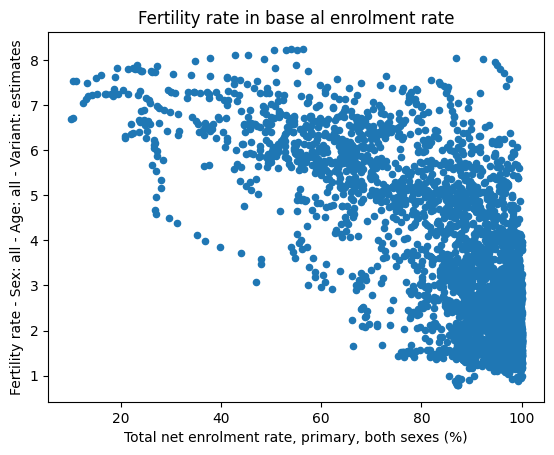

In [50]:
grafico = dataset.plot.scatter("Total net enrolment rate, primary, both sexes (%)", FERTILITY_COLUMN)
grafico.set_title("Fertility rate in base al enrolment rate");
plt.show()

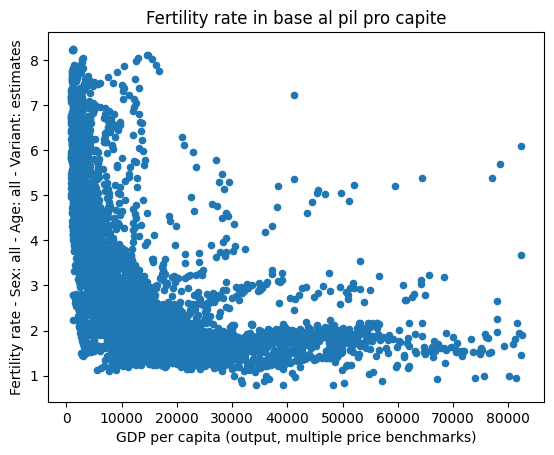

In [51]:
grafico = dataset.plot.scatter(GDP_COLUMN, FERTILITY_COLUMN)
grafico.set_title("Fertility rate in base al pil pro capite");
plt.show()

#Preparazione dei dati

In [52]:
X = dataset.drop(FERTILITY_COLUMN, axis=1)
y = dataset[FERTILITY_COLUMN]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

print('Accuracy on train {:.2f}%'.format(lrm.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(lrm.score(X_val, y_val)*100))

lrm.coef_, lrm.intercept_

Accuracy on train 62.84%
Accuracy on val 65.04%


(array([-6.48411591e-02, -3.47746122e-05]), 9.464392911838752)

#Regressione Lasso


Per prima cosa testiamo se con la regressione Lasso possiamo eliminare alcune feature perché poco rilevanti.

Creiamo una pipeline e facciamo partire la grid search che testa il modello in 5-cross fold validation secondo il set di iperparametri che gli chiediamo di valutare.

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Lasso())
])
grid = {
    "linreg__alpha": [0.1, 0.5, 1]
    }
gs = GridSearchCV(model, param_grid=grid, cv=5, return_train_score=True)
gs.fit(X_train, y_train)
sel = ["rank_test_score","mean_test_score","mean_train_score","params"]
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

,rank_test_score,mean_test_score,mean_train_score,params
0,1,0.623062,0.624059,{'linreg__alpha': 0.1}
1,2,0.515805,0.516383,{'linreg__alpha': 0.5}
2,3,0.232919,0.233535,{'linreg__alpha': 1}


Sceliamo quindi il parametro più piccolo perché vediamo che l'accuratezza crolla con una regolarizzazione più forte e addestriamo un modello allo scopo di individuare le feature più rilevanti.

In [56]:
model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Lasso(alpha=0.1))
])
model.fit(X_train, y_train);

In [57]:
model.named_steps["linreg"].coef_

array([-1.02652049, -0.48113133])

#Regressione Ridge


Testiamo ora il modello di regressione Ridge per valutare le performance di un modello di regressione lineare applicando però una regolarizzazione per evitare che i coefficienti crescano troppo.

In [58]:
from sklearn.linear_model import Ridge

model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Ridge())
])
grid = {
    "linreg__alpha": [0.1, 1, 10, 50]
    }
gs = GridSearchCV(model, param_grid=grid, cv=5, return_train_score=True)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

,rank_test_score,mean_test_score,mean_train_score,params
2,1,0.627372,0.628538,{'linreg__alpha': 10}
1,2,0.627372,0.628545,{'linreg__alpha': 1}
0,3,0.627371,0.628545,{'linreg__alpha': 0.1}
3,4,0.627242,0.628374,{'linreg__alpha': 50}


Vediamo come il valore alpha che rappresenta il peso della regolarizzazione non modifica particolarmente i risultati ottenuti questo ci fa propendere verso l'idea che con la semplice regressione lineare si possa comunque raggiungere un risultato soddisfacente.

#Regressione Lineare


Addestriamo quindi un modello di regressione lineare sul nostro train set e valutiamone l'accuratezza.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linear_model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", LinearRegression())
])

kf = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(model,X_train , y_train, cv=kf)
scores.mean()

0.6268516125243977

Vediamo come l'accuratezza raggiunta sia di fatto identica a quella della Regressione Ridge segno che la regolarizzazione non influisce in modo significativo sul risultato come avevamo previsto.

#Regressione Polinomiale

In [60]:
from sklearn.preprocessing import PolynomialFeatures
reduced_model = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge())
])
grid = {
    "poly__degree": list(range(2, 7)),
    "linreg__alpha": [0.1, 10]
    }
gs = GridSearchCV(reduced_model, param_grid=grid, return_train_score=True)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

,rank_test_score,mean_test_score,mean_train_score,params
3,1,0.729396,0.732380,"{'linreg__alpha': 0.1, 'poly__degree': 5}"
4,2,0.729392,0.733552,"{'linreg__alpha': 0.1, 'poly__degree': 6}"
2,3,0.729060,0.731523,"{'linreg__alpha': 0.1, 'poly__degree': 4}"
1,4,0.722692,0.725266,"{'linreg__alpha': 0.1, 'poly__degree': 3}"
9,5,0.719292,0.720935,"{'linreg__alpha': 10, 'poly__degree': 6}"
8,6,0.716646,0.718455,"{'linreg__alpha': 10, 'poly__degree': 5}"
7,7,0.714802,0.716387,"{'linreg__alpha': 10, 'poly__degree': 4}"
6,8,0.711872,0.712874,"{'linreg__alpha': 10, 'poly__degree': 3}"
0,9,0.694247,0.695765,"{'linreg__alpha': 0.1, 'poly__degree': 2}"
5,10,0.692513,0.693588,"{'linreg__alpha': 10, 'poly__degree': 2}"


Vediamo che l'accuratezza è aumentata rispetto al modello di regressione lineare.

#Valutazione del modello migliore

Andiamo ora a valutare con più attenzione i modelli che abbiamo addestrato. Scegliamo il modello Ridge ed il modello con regressione lineare che ci hanno dato i risultati migliori.

In [61]:
ridge = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Ridge(alpha=10))
])
linear = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", LinearRegression())
])
poly = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False,degree=5)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=0.1))
])
ridge.fit(X_train, y_train);
linear.fit(X_train,y_train);
poly.fit(X_train,y_train);

Dopo averli addestrati sulla totalità dei dati valutiamo i vari parametri dei modelli di regressione. Definiamo la funzione:

In [62]:
from sklearn.metrics import mean_squared_error
from rich.table import Table

def relative_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))

def eval_model(name, X, y, model):
  return [
      name,
      "{:.5}".format(mean_squared_error(model.predict(X), y)),
      "{:.5%}".format(relative_error(model.predict(X), y)),
      "{:.5}".format(model.score(X, y)),
  ]


table = Table(title="Valutazione errori")
rows = [
    eval_model("Linear Train", X_train, y_train, linear),
    eval_model("Linear Val", X_val, y_val, linear),
    eval_model("Ridge Train", X_train, y_train, ridge),
    eval_model("Ridge Val", X_val, y_val, ridge),
    eval_model("Poly Train", X_train, y_train, poly),
    eval_model("Poly Val", X_val, y_val, poly),
]

for column in ["Model", "Mean squared error", "Relative error", "R-squared coefficient"]:
    table.add_column(column)

for row in rows:
    table.add_row(*row, style='white')

table

                              Valutazione errori                              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model        ┃ Mean squared error ┃ Relative error ┃ R-squared coefficient ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Linear Train │ 1.1814             │ 31.87682%      │ 0.62844               │
│ Linear Val   │ 1.1744             │ 29.30092%      │ 0.65042               │
│ Ridge Train  │ 1.1814             │ 31.79443%      │ 0.62844               │
│ Ridge Val    │ 1.1749             │ 29.27419%      │ 0.65027               │
│ Poly Train   │ 0.85095            │ 21.47510%      │ 0.73237               │
│ Poly Val     │ 0.88592            │ 21.98042%      │ 0.73629               │
└──────────────┴────────────────────┴────────────────┴───────────────────────┘